In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import random

# Q1

In [ ]:
def plot_normal_histo(img):
    count_int = np.zeros(256)
    pixel_count = np.arange(256)
    
    n_pixels = 0
    for i in range(len(img)):
        for j in range(len(img[0])):
            count_int[img[i][j]] += 1
            n_pixels += 1
    count_int = count_int/n_pixels
    plt.bar(pixel_count, count_int)
    plt.show()
    return count_int

In [ ]:
def kl_divergence(p, q):
    #if np.all(q):
    kl_divergence = 0
    for i in range(len(p)):
        if (p[i]>0 and q[i]>0):
            kl_divergence += p[i] * math.log2(p[i]/q[i])
        return kl_divergence


In [ ]:
def calcEntropy(p):
    entropy= 0
    for x in p:
        if x > 0:
            entropy += - x * math.log(x, 2)
    return entropy


H(p, q)=H(p) + D(p||q)

Q1(a)  Function that accept two PMF's and calculate cross entropy brtween them.

In [ ]:
def CrossEntropy(p,q):
    H=calcEntropy(p)
    D=kl_divergence(p, q)
    
    #print(H)
    #print(D)
    return H+D

In [ ]:
p = [0.5, 0.25, 0.125, 0.125]  
q=[0.25,0.25, 0.25, 0.25]  

In [ ]:
CrossEntropy(p,q)

2.25

Q 1(a)(i)  Verify your function using the stereo image normalized histogram pair.

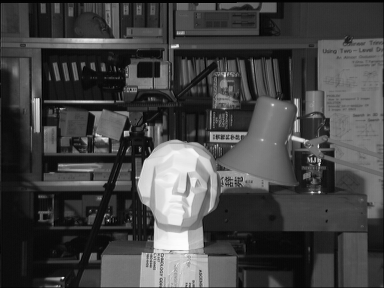

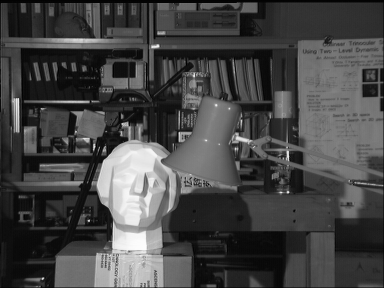

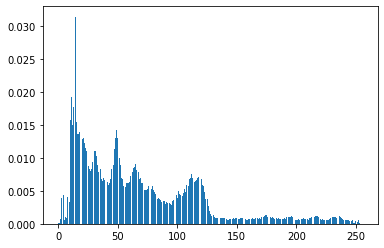

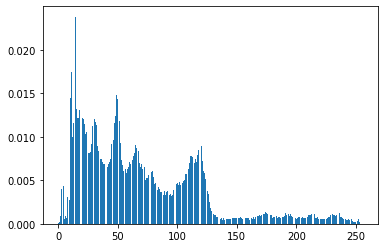

In [12]:
img1= Image.open('left.png')
img2= Image.open('right.png')
display(img1)
display(img2)
left = plot_normal_histo(np.asarray(img1))
right= plot_normal_histo(np.asarray(img2))

In [13]:
p = left
q = right

In [14]:
print(CrossEntropy(list(p),list(q)))

7.258490880598341


# Q 1(a)(ii) 
As with the KL divergence problem, choose a fixed PMF p ∼ Bern(r). Choose another PMF
q ∼ Bern(s) where s can be varied. Plot H(p, q) as a function of s.

In [15]:
r = 0.3
p = [r, 1-r]
s = np.linspace(0, 1, 10000)

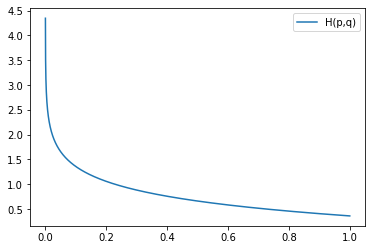

In [16]:
crossE = []
s = s[1:len(s)-1]
for val in s:
    crossE.append(CrossEntropy(p,[val, 1-val]) )
    
plt.plot(s, crossE, label = 'H(p,q)')
plt.legend(loc="upper right")
plt.show()

## PMFs match by minimizing the output

# Q1 (b)

In [17]:
p = left
q = right

In [18]:
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [19]:
J_pq = js_divergence(p,q)
J_qp = js_divergence(q,p)

In [20]:
print("JS divergence between PDF's p and q, J(p,q) =", J_pq)
print("JS divergence between PDF's q and p, J(q,p) =", J_qp)

JS divergence between PDF's p and q, J(p,q) = 1.4012101862482151e-05
JS divergence between PDF's q and p, J(q,p) = 1.4012101862482151e-05


In [21]:
print("JS distance between PDF's p and q, J(p,q) =", J_pq**0.5)
print("JS distance between PDF's q and p, J(q,p) =", J_qp**0.5)

JS distance between PDF's p and q, J(p,q) = 0.003743274216843077
JS distance between PDF's q and p, J(q,p) = 0.003743274216843077


JS(p,q) = JS(q,p)
Since JS distance between p and q is equal to JS distance between q and p, therefore JS divergence is symmetric.

In [22]:
D_pq = kl_divergence(p, q)
D_qp = kl_divergence(q, p)

In [23]:
print("KL divergence between PDF's p and q, J(p,q) =", D_pq)
print("KL divergence between PDF's q and p, J(q,p) =", D_qp)

KL divergence between PDF's p and q, J(p,q) = 0.0001967758484002143
KL divergence between PDF's q and p, J(q,p) = -8.102534934126471e-05


D(p || q) != D(q || p). Since KL divergence between p and q is not equal to KL divergence between q and p, therefore KL divergence is symmetric.



# Q1 (c)

In [24]:
def verify_pmf_marginals(joint_pmf , r , s):
    
  # Condition to check valid pmfs
    if ( (round(np.sum(r),1) == 1.0) and (round(np.sum(s), 1) == 1.0) and (round(np.sum(joint_pmf),1) == 1.0 ) ) : 

        m,n = joint_pmf.shape 

        r = np.round( r,decimals = 6)
        s =np.round(s,decimals =6)

        # Calculate marginals
        x_marg = np.round (np.sum(joint_pmf,axis =0), 5)
        y_marg = np.round (np.sum(joint_pmf,axis = 1), 5)

        
        # Comparing computed marginals with marginals passed in the function
        
        if (x_marg.shape[0] ==  r.shape[0]) and (y_marg.shape[0] ==  s.shape[0]):
            if (np.array_equal(x_marg,r)) and (np.array_equal(y_marg,s)):
                return True

            if (m==n):
                if (np.array_equal(y_marg,r)) and (np.array_equal(x_marg,s)):
                    return True

        elif  (x_marg.shape[0] == s.shape[0]) and (y_marg.shape[0] == r.shape[0]) :
            if (np.array_equal(y_marg,r)) and (np.array_equal(x_marg,s)):
                return True

    else :
        print("Invalid PMF")
  
    return False

Positive example

In [25]:
pmf =np.asarray([[1/8, 1/16, 1/32, 1/32],                    
               [1/16, 1/8, 1/32, 1/32],
               [1/16, 1/16, 1/16, 1/16],
               [1/4, 0, 0, 0]])
r = np.asarray([0.5  , 0.25,  0.125, 0.125])
s = np.asarray([0.25 ,0.25 ,0.25, 0.25])

In [26]:
verify_pmf_marginals(pmf , r , s)

True

Negative example

In [27]:
pmf =np.asarray([[1/8, 1/16, 1/32, 1/32],                    
               [1/16, 1/8, 1/32, 1/32],
               [1/16, 1/16, 1/16, 1/16],
               [1/4, 0, 0, 0]])
r = np.asarray([0.2, 0.3, 0.4, 0.1])
s = np.asarray([0.1,0.05,0.05, 0.8])

In [28]:
verify_pmf_marginals(pmf , r , s)

False

# Q2 (a) (i)

When we try to represent data which belongs to a high dimensional vector space using a low dimensional space of vectors then the crowding problem occurs. When we go from a lower dimension to a higher dimension, the nature of Euclidean distance changes.
The higher dimensional data when represented in lower dimensions, due to decrease in dimensions, crowding of data occurs.



## Question 2a ii)

If we use heavy tailed distribution like student-t distribution to convert distances into probabilitiesand  to reduce KL divergence, the pairwise distance between a data point and its neighbours need to be larger to obtain the same probability distribution as of a gaussian. Therefore, in the lower dimension the pairwise distance between a point and its neighbours would be larger and thereby avoid crowding.



## Question 2a iii)

in t-SNE, the KL divergence between the joint probability distribution in the higher dimensional space and the lower dimensional space is minimized in comparison to minimizing the conditional probabilities in SNE.

For speeding up the gradient based learning procedure a technique called early compression is.

Early exaggeration is also used in which all the pairwise joint probabilities are multiplied by some factor in the high dimensional space while keeping the probability values same for the lower dimensional space. 

So, the datapoints get separated but in clustered form. This makes more empty space and the clusters can move easily.

## Question 2b)

In [70]:
V1 = np.random.normal(1, 0.01, size=(10, 10))
V2 = np.random.normal(10, 0.01, size=(10, 10))
V = np.concatenate((V1, V2), axis=0)

print(V.shape)

(20, 10)


In [71]:
# Eq-1 given in the t-SNE paper 
def dis_2_prob_high(v):
    
    p = np.zeros((v.shape[0], v.shape[0]))
    val = 0.01
    length = v.shape[0]
    
    for i in range( length):
    
        p[i,i] = 0.0
        for j in range(v.shape[0]):
            if i != j:
                p[i,j] = np.exp(-1* (np.sum((v[i] - v[j])**2)/(2*val)))
        
        t = (p[i,:] != 0)
        p[i,:] = p[i,:]/np.sum(p[i,t])

    return p

In [72]:
# Eq-4 given in the t-SNE paper by Van der Maaten et. al
def dis_2_prob_low(w):
    q = np.zeros((w.shape[0], w.shape[0]))
    length = w.shape[0]
    for i in range(length):
    
        q[i,i] = 0.0
        for j in range(w.shape[0]):
            if i != j:
                q[i,j] = np.power(1+np.sum((w[i] - w[j])**2), -1)
        
        t = (q[i,:] != 0)
        q[i,:] = q[i,:]/np.sum(q[i,t])

    return q

In [73]:
def KL(p, q):
    p = p + 1e-14
    q = q + 1e-14
    return np.sum(p * (np.log2(p) - np.log2(q)))

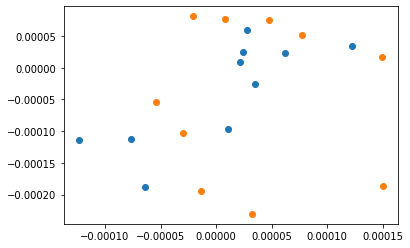

In [74]:
num_of_dim = 2
total_epochs = 50

momentum = 2
rate = 0.1


p_ij = (dis_2_prob_high(V) + dis_2_prob_high(V).T)/2*V.shape[0]

# Initialise 25 points with a random vector in 2 dimensions
Y = np.random.normal(0, 10**-4, size=(20, num_of_dim))

#print("Y plot before gradient descent\n")
plt.scatter(Y[:10, 0], Y[:10, 1])
plt.scatter(Y[10:, 0], Y[10:, 1])

plt.show()

KL before starting: 2160.3574547757044
KL after training: 3515.7187

Y plot after gradient descent



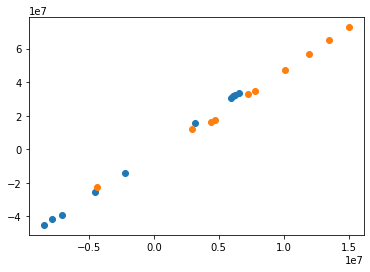

In [75]:
# This is the Training algorithm

print(f"KL before starting: {KL(p_ij, dis_2_prob_low(Y)) :}")
y_old = np.zeros((2, *Y.shape))
for epochs in range(total_epochs):
    q_i_j = dis_2_prob_low(Y)
    for i in range(Y.shape[0]):
        dC = 0
        for j in range(Y.shape[0]):
            dC += (Y[i] - Y[j]) * (p_ij[i, j] - q_i_j[i, j]) * ((1 + np.sum((Y[i] - Y[j])**2))**-1)
        
        Y[i] = -4 * rate * dC + momentum * (y_old[1, i, :] - y_old[0, i, :])
        y_old[0, i, :] = y_old[1, i, :]
        y_old[1, i, :] = Y[i]

print(f"KL after training: {KL(p_ij, dis_2_prob_low(Y)) :.4f}\n")
print("Y plot after gradient descent\n")
plt.scatter(Y[:10, 0], Y[:10, 1])
plt.scatter(Y[10:, 0], Y[10:, 1])

## Question 2c)

Text(0.5, 1.0, 'Perplexity: 5')

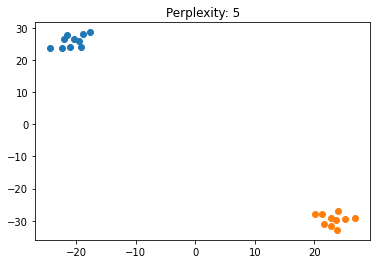

In [76]:
from sklearn.manifold import TSNE

embed_X = TSNE(n_components=2, perplexity=5, learning_rate="auto", init="random").fit_transform(V)

plt.scatter(embed_X[:10, 0], embed_X[:10, 1])
plt.scatter(embed_X[10:, 0], embed_X[10:, 1])
plt.title("Perplexity: 5")

Text(0.5, 1.0, 'Perplexity: 15')

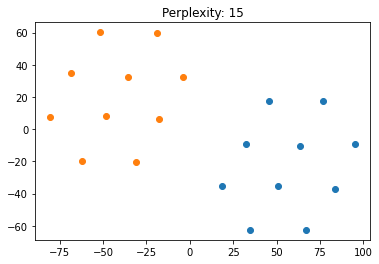

In [77]:
embed_X = TSNE(n_components=2, perplexity=15, learning_rate="auto", init="random").fit_transform(V)

plt.scatter(embed_X[:10, 0], embed_X[:10, 1])
plt.scatter(embed_X[10:, 0], embed_X[10:, 1])
plt.title("Perplexity: 15")

Text(0.5, 1.0, 'Perplexity: 25')

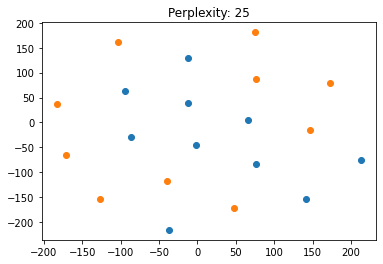

In [78]:
embed_X = TSNE(n_components=2, perplexity=25, learning_rate="auto", init="random").fit_transform(V)

plt.scatter(embed_X[:10, 0], embed_X[:10, 1])
plt.scatter(embed_X[10:, 0], embed_X[10:, 1])
plt.title("Perplexity: 25")

Text(0.5, 1.0, 'Perplexity: 40')

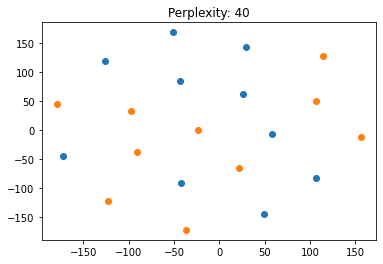

In [79]:
embed_X = TSNE(n_components=2, perplexity=40, learning_rate="auto", init="random").fit_transform(V)

plt.scatter(embed_X[:10, 0], embed_X[:10, 1])
plt.scatter(embed_X[10:, 0], embed_X[10:, 1])
plt.title("Perplexity: 40")

As perplexity increases, the space among the data points become more and as a result they spread more in the cluster.

## Question 3 a)

(256, 256, 3)


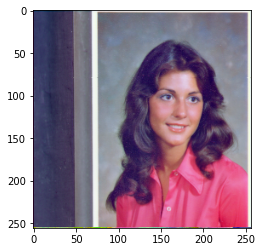

In [80]:
img1 = Image.open("4.1.04.tiff").convert("RGB")

image = np.array(img1)
plt.imshow(image)
print(image.shape)

In [81]:
def convolve_image(image, kernel):
    height, width, channels = image.shape
    hs, ws, cs = kernel.shape

    # Calculate convolved output dimensions
    con_h = height + hs - 1
    con_w = width + ws - 1

    # calculate reflection
    rh = (con_h - height)//2
    rw = (con_w - width)//2

    img_holder = np.zeros((con_h, con_w, channels))
    output = np.zeros((con_h, con_w))

    # Adding reflection
    img_holder[ :rw, rh:-rh, :] = np.flipud(image[ :rw, :, :])
    img_holder[ -rw:, rh:-rh, :] = np.flipud(image[ -rw:, :, :])
    img_holder[ rw:-rw, :rh, :] = np.fliplr(image[ :, :rh, :])
    img_holder[ rw:-rw, -rh:, :] = np.fliplr(image[ :, -rh:, :])

    img_holder[ rw:-rw, rh:-rh, :] = image

    # Flipping the kernel along x and y
    kernel = np.flip(kernel, axis=(0, 1))

    img_holder = img_holder/255.0
    kernel = kernel/255.0

    for i in range(width):
        for j in range(height):
            output[i, j] = np.sum(img_holder[i:i+ws, j:j+hs, :] * kernel)

    return output[ :-2*rw, :-2*rh]

In [82]:
def correlate_image(image, kernel):
    height, width, channels = image.shape
    hs, ws, cs = kernel.shape

    # Calculate convolved output dimensions
    con_h = height + hs - 1
    con_w = width + ws - 1

    # calculate reflection
    rh = (con_h - height)//2
    rw = (con_w - width)//2

    img_holder = np.zeros((con_h, con_w, channels))
    output = np.zeros((con_h, con_w))

    # Adding reflection
    img_holder[ :rw, rh:-rh, :] = np.flipud(image[ :rw, :, :])
    img_holder[ -rw:, rh:-rh, :] = np.flipud(image[ -rw:, :, :])
    img_holder[ rw:-rw, :rh, :] = np.fliplr(image[ :, :rh, :])
    img_holder[ rw:-rw, -rh:, :] = np.fliplr(image[ :, -rh:, :])

    img_holder[ rw:-rw, rh:-rh, :] = image


    img_holder = img_holder/255.0
    kernel = kernel/255.0

    for i in range(width):
        for j in range(height):
            output[i, j] = np.sum(img_holder[i:i+ws, j:j+hs, :] * kernel)

    # return output without reflection
    return output[ :-2*rw, :-2*rh]

(25, 25, 3)


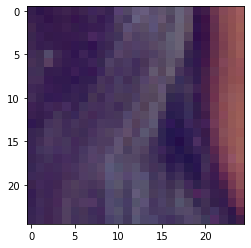

In [83]:
#Extracted from the centre
h, w, c = image.shape
kernel3 = image[ h//2-5:h//2+6, w//2-5:w//2+6,:]

# 5x5 kernel
# Extracted from the centre
kernel5 = image[ h//2-12:h//2+13, w//2-12:w//2+13,:]
plt.imshow(kernel5)
print(kernel5.shape)

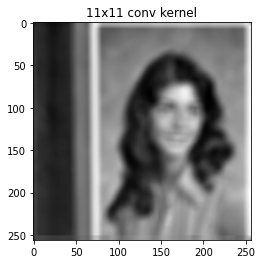

In [84]:
convo_out_3 = convolve_image(image, kernel3)
plt.imshow(convo_out_3, cmap="gray")
plt.title("11x11 conv kernel")
plt.show()

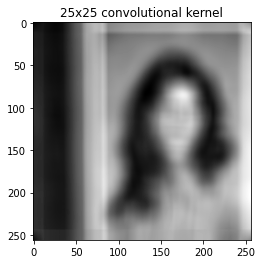

In [85]:
convo_out_5 = convolve_image(image, kernel5)
plt.imshow(convo_out_5, cmap="gray")
plt.title("25x25 convolutional kernel")
plt.show()

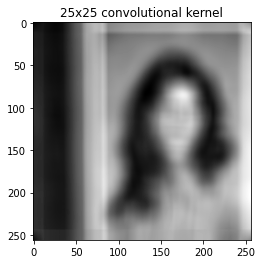

In [86]:
corr_out_3 = convolve_image(image, kernel5)
plt.imshow(corr_out_3, cmap="gray")
plt.title("25x25 convolutional kernel")
plt.show()

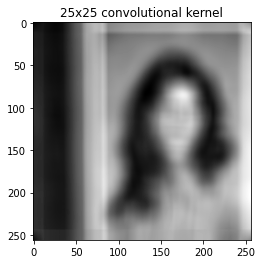

In [87]:
corr_out_5 = convolve_image(image, kernel5)
plt.imshow(corr_out_5, cmap="gray")
plt.title("25x25 convolutional kernel")
plt.show()